In [48]:
# Import libraries
import os
from dotenv import load_dotenv
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict, List
from IPython.display import display, Image
from langgraph.checkpoint.memory import MemorySaver

In [31]:
# Load environment
load_dotenv()
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

In [32]:
# Difine LLM model
model = ChatOpenAI(model="gpt-4o")

In [33]:
# Define Graph state
class State(TypedDict):
    question: str
    answer: str
    chat_history: List[str]

In [54]:
# Define conversation
def chat_with_aegnt(state:State)-> State:
    """Processes user question while maintaining chat history."""
    chat_history = state.get("chat_history", [])
    question = state["question"]
    try:
        if not question:
            raise Exception("Ask a question")
        if len(chat_history) > 0:
            context = "\n".join(chat_history)
            context += "Consider the previous conversation as context and answer the following question as per your knowledge\n"
            context += f"Question:{question}"
        else:
            context = "answer the following question as per your knowledge\n"
            context += f"Question:{question}"
        response = model.invoke(context)
        chat_history.append(f"User:{question}")
        chat_history.append(f"Agent:{response.content}")
        return {"answer": response.content, "chat_history": chat_history}
    except Exception as e:
        print(f"Exception:{e}")

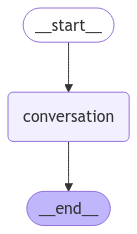

In [55]:
# Define Graph
workflow = StateGraph(State)
# Add node
workflow.add_node("conversation", chat_with_aegnt)
# Add edge
workflow.add_edge(START, "conversation")
workflow.add_edge("conversation", END)
# Compile graph
memory = MemorySaver()
graph = workflow.compile(checkpointer=memory)
# Display graph
display(Image(graph.get_graph().draw_mermaid_png()))

In [56]:
config = { "configurable": {"thread_id": "1"}}
# Graph Invokation
def invoke_graph(question):
    output = graph.invoke({"question": question}, config)
    print(f"Question:{output['question']}\n")
    print(f"Answer:{output['answer']}\n\n")
    print(f"History:\n{output['chat_history']}")

In [57]:
invoke_graph("What is langchain?")

Question:What is langchain?

Answer:LangChain is a framework designed to facilitate the development of applications powered by large language models (LLMs). It provides a suite of tools and abstractions that simplify the process of integrating LLMs into various applications. LangChain is often used to build complex applications that require tasks such as natural language processing, information retrieval, and conversational agents. It supports the seamless connection of LLMs with external data sources, APIs, and other services, enabling developers to create more dynamic and interactive user experiences. The framework also emphasizes composability and modularity, allowing developers to mix and match different components to build customized solutions efficiently.


History:
['User:What is langchain?', 'Agent:LangChain is a framework designed to facilitate the development of applications powered by large language models (LLMs). It provides a suite of tools and abstractions that simplify t

In [58]:
invoke_graph("How to install it?")

Question:How to install it?

Answer:To install LangChain, you can use Python's package manager, pip. Open your command line or terminal and run the following command:

```bash
pip install langchain
```

This will download and install the LangChain package and its dependencies. Make sure you have Python and pip installed on your system before running the command. Once installed, you can start using LangChain in your Python projects to develop applications powered by large language models.


History:
['User:What is langchain?', 'Agent:LangChain is a framework designed to facilitate the development of applications powered by large language models (LLMs). It provides a suite of tools and abstractions that simplify the process of integrating LLMs into various applications. LangChain is often used to build complex applications that require tasks such as natural language processing, information retrieval, and conversational agents. It supports the seamless connection of LLMs with external dat

In [62]:
invoke_graph("")

Exception:Ask a question
Question:

Answer:To install LangChain, you can use Python's package manager, pip. Open your command line or terminal and run the following command:

```bash
pip install langchain
```

This will download and install the LangChain package and its dependencies. Make sure you have Python and pip installed on your system before running the command. Once installed, you can start using LangChain in your Python projects to develop applications powered by large language models.


History:
['User:What is langchain?', 'Agent:LangChain is a framework designed to facilitate the development of applications powered by large language models (LLMs). It provides a suite of tools and abstractions that simplify the process of integrating LLMs into various applications. LangChain is often used to build complex applications that require tasks such as natural language processing, information retrieval, and conversational agents. It supports the seamless connection of LLMs with exter